In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/two-sigma-connect-rental-listing-inquiries/images_sample.zip
/kaggle/input/two-sigma-connect-rental-listing-inquiries/Kaggle-renthop.torrent
/kaggle/input/two-sigma-connect-rental-listing-inquiries/sample_submission.csv.zip
/kaggle/input/two-sigma-connect-rental-listing-inquiries/test.json.zip
/kaggle/input/two-sigma-connect-rental-listing-inquiries/train.json.zip
/kaggle/input/twosigmaconnectrentallistinginquiries/README.md


In [2]:
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import itertools

import string
import re
import collections
from sklearn import  preprocessing
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.metrics import make_scorer, f1_score, accuracy_score, mean_absolute_error, confusion_matrix
import optuna


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV
from collections import Counter

np.set_printoptions(precision=4)

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
sns.set_style("whitegrid")
import warnings




In [3]:
simple = pd.read_csv("../input/two-sigma-connect-rental-listing-inquiries/sample_submission.csv.zip")
simple

,listing_id,high,medium,low
0,7142618,0.077788,0.227529,0.694683
1,7210040,0.077788,0.227529,0.694683
2,7174566,0.077788,0.227529,0.694683
3,7191391,0.077788,0.227529,0.694683
4,7171695,0.077788,0.227529,0.694683
...,...,...,...,...
74654,6928108,0.077788,0.227529,0.694683
74655,6906674,0.077788,0.227529,0.694683
74656,6897967,0.077788,0.227529,0.694683
74657,6842183,0.077788,0.227529,0.694683


In [4]:
train = pd.read_json('../input/two-sigma-connect-rental-listing-inquiries/train.json.zip')
test = pd.read_json('../input/two-sigma-connect-rental-listing-inquiries/test.json.zip')

# Basic Insight of Dataset (Базовое представление о наборе данных)


In [5]:
train. head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,"Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !<br /><br />Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing!<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><p><a website_redacted",145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Dishwasher, Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,"[https://photos.renthop.com/2/7170325_3bb5ac84a5a10227b17b273e79bd77b4.jpg, https://photos.renthop.com/2/7170325_a29a17a771ee6af213966699b05c8ea2.jpg, https://photos.renthop.com/2/7170325_149a898e8760cac1cad56e30cfe98baa.jpg, https://photos.renthop.com/2/7170325_f74a43d781bcc3c5588e61dd47de81ba.jpg, https://photos.renthop.com/2/7170325_e677d9d249ac99abe01aa5454c6e9f59.jpg, https://photos.renthop.com/2/7170325_960ea0e180bf2f15467b68b455db6172.jpg, https://photos.renthop.com/2/7170325_cbc1b8437155dbf7f5d63b3a0b5a45a3.jpg, https://photos.renthop.com/2/7170325_9a9f2adc2ce922e1d5394727efdf64bb.jpg, https://photos.renthop.com/2/7170325_aae2a39d536103eebb282775fab1c315.jpg, https://photos.renthop.com/2/7170325_cd290d0051b9f08e3482195dcbf6b5a6.jpg, https://photos.renthop.com/2/7170325_a2b599da7880eea1edd10c4b04250dc1.jpg, https://photos.renthop.com/2/7170325_6b83fa82d662bcb09733ac3a8a107113.jpg]",2400,145 Borinquen Place,medium


In [6]:
train.shape

(49352, 15)

In [7]:
test.shape


(74659, 14)

In [8]:
print(train.columns.values)

['bathrooms' 'bedrooms' 'building_id' 'created' 'description'
 'display_address' 'features' 'latitude' 'listing_id' 'longitude'
 'manager_id' 'photos' 'price' 'street_address' 'interest_level']


In [9]:
print(test.columns.values)

['bathrooms' 'bedrooms' 'building_id' 'created' 'description'
 'display_address' 'features' 'latitude' 'listing_id' 'longitude'
 'manager_id' 'photos' 'price' 'street_address']


In [10]:
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [11]:
train.describe(include = "all")

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
count,49352.00000,49352.000000,49352,49352,49352,49352,49352,49352.000000,4.935200e+04,49352.000000,49352,49352,4.935200e+04,49352,49352
unique,NaN,NaN,7585,48675,38244,8826,10254,NaN,NaN,NaN,3481,45677,NaN,15358,3
top,NaN,NaN,0,2016-04-08 01:14:27,,Broadway,[],NaN,NaN,NaN,e6472c7237327dd3903b3d6f6a94515a,[],NaN,3333 Broadway,low
freq,NaN,NaN,8286,3,1647,438,3218,NaN,NaN,NaN,2533,3615,NaN,174,34284
mean,1.21218,1.541640,NaN,NaN,NaN,NaN,NaN,40.741545,7.024055e+06,-73.955716,NaN,NaN,3.830174e+03,NaN,NaN
std,0.50142,1.115018,NaN,NaN,NaN,NaN,NaN,0.638535,1.262746e+05,1.177912,NaN,NaN,2.206687e+04,NaN,NaN
min,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,6.811957e+06,-118.271000,NaN,NaN,4.300000e+01,NaN,NaN
25%,1.00000,1.000000,NaN,NaN,NaN,NaN,NaN,40.728300,6.915888e+06,-73.991700,NaN,NaN,2.500000e+03,NaN,NaN
50%,1.00000,1.000000,NaN,NaN,NaN,NaN,NaN,40.751800,7.021070e+06,-73.977900,NaN,NaN,3.150000e+03,NaN,NaN
75%,1.00000,2.000000,NaN,NaN,NaN,NaN,NaN,40.774300,7.128733e+06,-73.954800,NaN,NaN,4.100000e+03,NaN,NaN


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74659 entries, 0 to 124010
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        74659 non-null  float64
 1   bedrooms         74659 non-null  int64  
 2   building_id      74659 non-null  object 
 3   created          74659 non-null  object 
 4   description      74659 non-null  object 
 5   display_address  74659 non-null  object 
 6   features         74659 non-null  object 
 7   latitude         74659 non-null  float64
 8   listing_id       74659 non-null  int64  
 9   longitude        74659 non-null  float64
 10  manager_id       74659 non-null  object 
 11  photos           74659 non-null  object 
 12  price            74659 non-null  int64  
 13  street_address   74659 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.5+ MB


In [14]:
train.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

In [15]:
test.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

# Data visualization , pre-processing  and Feature engineering

### 'interest_level'


In [16]:
train.groupby(train['interest_level']).mean()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
interest_level,,,,,,
high,1.116176,1.546496,40.748007,7.017844e+06,-73.964613,2700.293045
low,1.238741,1.514759,40.739504,7.026373e+06,-73.951667,4176.599142
medium,1.163906,1.622050,40.745567,7.019098e+06,-73.965033,3158.767388


In [17]:
train['interest_level'].value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

<AxesSubplot:xlabel='interest_level', ylabel='count'>

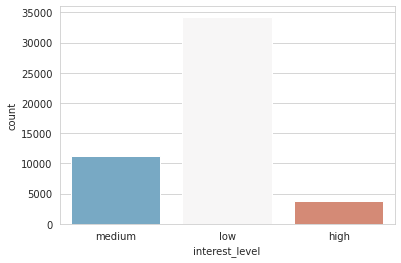

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='interest_level',data=train,palette='RdBu_r')

### 'bathrooms'

In [19]:
# Value Counts
train['bathrooms'].value_counts()



1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
7.0         1
10.0        1
Name: bathrooms, dtype: int64

In [20]:
train.groupby(['bathrooms']) ['interest_level'].value_counts(normalize=True)

bathrooms  interest_level
0.0        low               0.977636
           medium            0.019169
           high              0.003195
1.0        low               0.674268
           medium            0.239156
           high              0.086576
1.5        low               0.937984
           medium            0.062016
2.0        low               0.726632
           medium            0.220235
           high              0.053133
2.5        low               0.989170
           medium            0.010830
3.0        low               0.900671
           medium            0.080537
           high              0.018792
3.5        low               1.000000
4.0        low               0.943396
           medium            0.031447
           high              0.025157
4.5        low               1.000000
5.0        low               1.000000
5.5        low               1.000000
6.0        low               1.000000
6.5        low               1.000000
7.0        low          

<AxesSubplot:xlabel='bathrooms'>

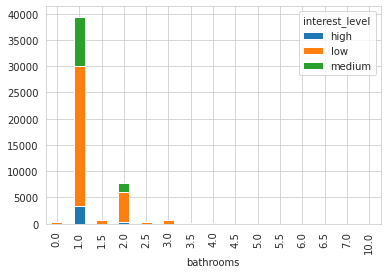

In [21]:
train.pivot_table('price', 'bathrooms', 'interest_level', 'count').plot(kind='bar', stacked=True)

### 'bedrooms'

In [22]:
# Value Counts
train['bedrooms'].value_counts()

1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64

In [23]:
train.groupby(['bedrooms']) ['interest_level'].value_counts(normalize=True)

bedrooms  interest_level
0         low               0.687916
          medium            0.222691
          high              0.089393
1         low               0.743715
          medium            0.196420
          high              0.059865
2         low               0.670246
          medium            0.240443
          high              0.089311
3         low               0.649670
          medium            0.268966
          high              0.081363
4         low               0.639191
          medium            0.283567
          high              0.077242
5         low               0.983806
          high              0.008097
          medium            0.008097
6         low               0.956522
          medium            0.043478
7         low               0.500000
          medium            0.500000
8         low               1.000000
Name: interest_level, dtype: float64

<AxesSubplot:xlabel='bedrooms'>

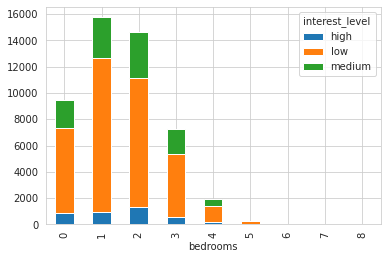

In [24]:
train.pivot_table('price', 'bedrooms', 'interest_level', 'count').plot(kind='bar', stacked=True)

<AxesSubplot:title={'center':'bedrooms'}, xlabel='bedrooms'>

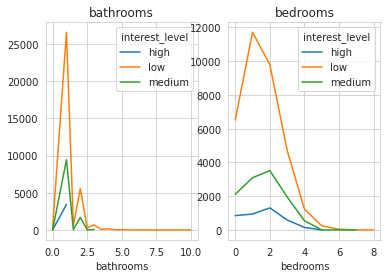

In [25]:
# 'bathrooms' and 'bedrooms'
fig, axes = plt.subplots(ncols=2)
train.pivot_table('price', ['bathrooms'], 'interest_level', 'count').plot(ax=axes[0], title='bathrooms')
train.pivot_table('price', ['bedrooms'], 'interest_level', 'count').plot(ax=axes[1], title='bedrooms')

### Feature engineering

In [26]:
train["room_sum"] = train["bedrooms"]+train["bathrooms"]
train["bed_bath_dif"] = train["bedrooms"] - train["bathrooms"]
train.head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,room_sum,bed_bath_dif
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,"Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !<br /><br />Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing!<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><p><a website_redacted",145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Dishwasher, Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,"[https://photos.renthop.com/2/7170325_3bb5ac84a5a10227b17b273e79bd77b4.jpg, https://photos.renthop.com/2/7170325_a29a17a771ee6af213966699b05c8ea2.jpg, https://photos.renthop.com/2/7170325_149a898e8760cac1cad56e30cfe98baa.jpg, https://photos.renthop.com/2/7170325_f74a43d781bcc3c5588e61dd47de81ba.jpg, https://photos.renthop.com/2/7170325_e677d9d249ac99abe01aa5454c6e9f59.jpg, https://photos.renthop.com/2/7170325_960ea0e180bf2f15467b68b455db6172.jpg, https://photos.renthop.com/2/7170325_cbc1b8437155dbf7f5d63b3a0b5a45a3.jpg, https://photos.renthop.com/2/7170325_9a9f2adc2ce922e1d5394727efdf64bb.jpg, https://photos.renthop.com/2/7170325_aae2a39d536103eebb282775fab1c315.jpg, https://photos.renthop.com/2/7170325_cd290d0051b9f08e3482195dcbf6b5a6.jpg, https://photos.renthop.com/2/7170325_a2b599da7880eea1edd10c4b04250dc1.jpg, https://photos.renthop.com/2/7170325_6b83fa82d662bcb09733ac3a8a107113.jpg]",2400,145 Borinquen Place,medium,2.0,0.0


In [27]:
test["room_sum"] = test["bedrooms"]+test["bathrooms"]
test["bed_bath_dif"] = test["bedrooms"] - test["bathrooms"]
test.head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,room_sum,bed_bath_dif
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,"Large with awesome terrace--accessible via bedroom and living room. Unique find in the LES.Apartment Features:-Large terrace via bedroom and living room-Hardwood floors-Newly renovated -Granite counter top-Breakfast Bar-Ample counter space and storage-Dishwasher-Great Lighting Neighborhood Features:-A few blocks from Whole Foods-1 block from the J, Z and M subway-All the restaurants and night life the Lower East Side is known for (Hotel Chantel, DL, Pianos)Call/txt/Email James to set up a showing:kagglemanager@renthop.com<br /><br /><br /><br /><br /><br /><p><a website_redacted",Suffolk Street,"[Elevator, Laundry in Building, Laundry in Unit, Dishwasher, Hardwood Floors, Outdoor Space]",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,"[https://photos.renthop.com/2/7142618_1c45a2c8f45e649b9ee77681cc7ca438.jpg, https://photos.renthop.com/2/7142618_2a0268ff01f834c1039027a04e54edf4.jpg, https://photos.renthop.com/2/7142618_1645edaeb3892d35c190356eeb16bd75.jpg, https://photos.renthop.com/2/7142618_ca5c03339bd1f021b94da72af7356bca.jpg, https://photos.renthop.com/2/7142618_b129d432a96a0ad419f1af430f4a20ff.jpg, https://photos.renthop.com/2/7142618_dd3c3651b991455d3ed7403766c6941d.jpg, https://photos.renthop.com/2/7142618_4ddef2aee0c343f5a86da7113f9336fc.jpg, https://photos.renthop.com/2/7142618_6c51aec64570affecc573efbdc4453ca.jpg]",2950,99 Suffolk Street,2.0,0.0


### 'building_id

In [28]:
# Most advertised buildings
train.building_id.value_counts().nlargest(10)

0                                   8286
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
f68bf347f99df026f4faad43cc604048     191
c94301249b8c09429d329864d58e5b82     167
ce6d18bf3238e668b2bf23f4110b7b67     165
57ef86c28a8ae482dc3a3c3af28e8e48     159
128d4af0683efc5e1eded8dc8044d5e3     153
Name: building_id, dtype: int64

In [29]:
building_id = train["building_id"].value_counts()
train["building_count"] = train["building_id"].apply(lambda x:building_id[x])

train.head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,room_sum,bed_bath_dif,building_count
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,"Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !<br /><br />Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing!<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><p><a website_redacted",145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Dishwasher, Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,"[https://photos.renthop.com/2/7170325_3bb5ac84a5a10227b17b273e79bd77b4.jpg, https://photos.renthop.com/2/7170325_a29a17a771ee6af213966699b05c8ea2.jpg, https://photos.renthop.com/2/7170325_149a898e8760cac1cad56e30cfe98baa.jpg, https://photos.renthop.com/2/7170325_f74a43d781bcc3c5588e61dd47de81ba.jpg, https://photos.renthop.com/2/7170325_e677d9d249ac99abe01aa5454c6e9f59.jpg, https://photos.renthop.com/2/7170325_960ea0e180bf2f15467b68b455db6172.jpg, https://photos.renthop.com/2/7170325_cbc1b8437155dbf7f5d63b3a0b5a45a3.jpg, https://photos.renthop.com/2/7170325_9a9f2adc2ce922e1d5394727efdf64bb.jpg, https://photos.renthop.com/2/7170325_aae2a39d536103eebb282775fab1c315.jpg, https://photos.renthop.com/2/7170325_cd290d0051b9f08e3482195dcbf6b5a6.jpg, https://photos.renthop.com/2/7170325_a2b599da7880eea1edd10c4b04250dc1.jpg, https://photos.renthop.com/2/7170325_6b83fa82d662bcb09733ac3a8a107113.jpg]",2400,145 Borinquen Place,medium,2.0,0.0,5


In [30]:
building_id = test["building_id"].value_counts()
test["building_count"] = test["building_id"].apply(lambda x:building_id[x])
test.head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,room_sum,bed_bath_dif,building_count
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,"Large with awesome terrace--accessible via bedroom and living room. Unique find in the LES.Apartment Features:-Large terrace via bedroom and living room-Hardwood floors-Newly renovated -Granite counter top-Breakfast Bar-Ample counter space and storage-Dishwasher-Great Lighting Neighborhood Features:-A few blocks from Whole Foods-1 block from the J, Z and M subway-All the restaurants and night life the Lower East Side is known for (Hotel Chantel, DL, Pianos)Call/txt/Email James to set up a showing:kagglemanager@renthop.com<br /><br /><br /><br /><br /><br /><p><a website_redacted",Suffolk Street,"[Elevator, Laundry in Building, Laundry in Unit, Dishwasher, Hardwood Floors, Outdoor Space]",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,"[https://photos.renthop.com/2/7142618_1c45a2c8f45e649b9ee77681cc7ca438.jpg, https://photos.renthop.com/2/7142618_2a0268ff01f834c1039027a04e54edf4.jpg, https://photos.renthop.com/2/7142618_1645edaeb3892d35c190356eeb16bd75.jpg, https://photos.renthop.com/2/7142618_ca5c03339bd1f021b94da72af7356bca.jpg, https://photos.renthop.com/2/7142618_b129d432a96a0ad419f1af430f4a20ff.jpg, https://photos.renthop.com/2/7142618_dd3c3651b991455d3ed7403766c6941d.jpg, https://photos.renthop.com/2/7142618_4ddef2aee0c343f5a86da7113f9336fc.jpg, https://photos.renthop.com/2/7142618_6c51aec64570affecc573efbdc4453ca.jpg]",2950,99 Suffolk Street,2.0,0.0,5


### 'created'

In [31]:
# Convertion to Python Date  (Преобразование в дату Python)
train.created = pd.to_datetime(train.created, format='%Y-%m-%d %H:%M:%S')
test.created = pd.to_datetime(test.created, format='%Y-%m-%d %H:%M:%S')

In [32]:
# Year, Month, Day of Week and Hour Features  (Год, Месяц, день недели и часы)
train["year"] = train.created.dt.year
train['month'] = train.created.dt.month
train["day"] = train.created.dt.day
train['day_of_week'] = train.created.dt.weekday
train['hour'] = train.created.dt.hour

train.head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,room_sum,bed_bath_dif,building_count,year,month,day,day_of_week,hour
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,"Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !<br /><br />Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing!<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><p><a website_redacted",145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Dishwasher, Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,"[https://photos.renthop.com/2/7170325_3bb5ac84a5a10227b17b273e79bd77b4.jpg, https://photos.renthop.com/2/7170325_a29a17a771ee6af213966699b05c8ea2.jpg, https://photos.renthop.com/2/7170325_149a898e8760cac1cad56e30cfe98baa.jpg, https://photos.renthop.com/2/7170325_f74a43d781bcc3c5588e61dd47de81ba.jpg, https://photos.renthop.com/2/7170325_e677d9d249ac99abe01aa5454c6e9f59.jpg, https://photos.renthop.com/2/7170325_960ea0e180bf2f15467b68b455db6172.jpg, https://photos.renthop.com/2/7170325_cbc1b8437155dbf7f5d63b3a0b5a45a3.jpg, https://photos.renthop.com/2/7170325_9a9f2adc2ce922e1d5394727efdf64bb.jpg, https://photos.renthop.com/2/7170325_aae2a39d536103eebb282775fab1c315.jpg, https://photos.renthop.com/2/7170325_cd290d0051b9f08e3482195dcbf6b5a6.jpg, https://photos.renthop.com/2/7170325_a2b599da7880eea1edd10c4b04250dc1.jpg, https://photos.renthop.com/2/7170325_6b83fa82d662bcb09733ac3a8a107113.jpg]",2400,145 Borinquen Place,medium,2.0,0.0,5,2016,6,16,3,5


In [33]:
# Year, Month, Day of Week and Hour Features  (Год, Месяц, день недели и часы)
test["year"] = test.created.dt.year
test['month'] = test.created.dt.month
test["day"] = test.created.dt.day
test['day_of_week'] = test.created.dt.weekday
test['hour'] = test.created.dt.hour

test.head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,room_sum,bed_bath_dif,building_count,year,month,day,day_of_week,hour
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,"Large with awesome terrace--accessible via bedroom and living room. Unique find in the LES.Apartment Features:-Large terrace via bedroom and living room-Hardwood floors-Newly renovated -Granite counter top-Breakfast Bar-Ample counter space and storage-Dishwasher-Great Lighting Neighborhood Features:-A few blocks from Whole Foods-1 block from the J, Z and M subway-All the restaurants and night life the Lower East Side is known for (Hotel Chantel, DL, Pianos)Call/txt/Email James to set up a showing:kagglemanager@renthop.com<br /><br /><br /><br /><br /><br /><p><a website_redacted",Suffolk Street,"[Elevator, Laundry in Building, Laundry in Unit, Dishwasher, Hardwood Floors, Outdoor Space]",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,"[https://photos.renthop.com/2/7142618_1c45a2c8f45e649b9ee77681cc7ca438.jpg, https://photos.renthop.com/2/7142618_2a0268ff01f834c1039027a04e54edf4.jpg, https://photos.renthop.com/2/7142618_1645edaeb3892d35c190356eeb16bd75.jpg, https://photos.renthop.com/2/7142618_ca5c03339bd1f021b94da72af7356bca.jpg, https://photos.renthop.com/2/7142618_b129d432a96a0ad419f1af430f4a20ff.jpg, https://photos.renthop.com/2/7142618_dd3c3651b991455d3ed7403766c6941d.jpg, https://photos.renthop.com/2/7142618_4ddef2aee0c343f5a86da7113f9336fc.jpg, https://photos.renthop.com/2/7142618_6c51aec64570affecc573efbdc4453ca.jpg]",2950,99 Suffolk Street,2.0,0.0,5,2016,6,11,5,5


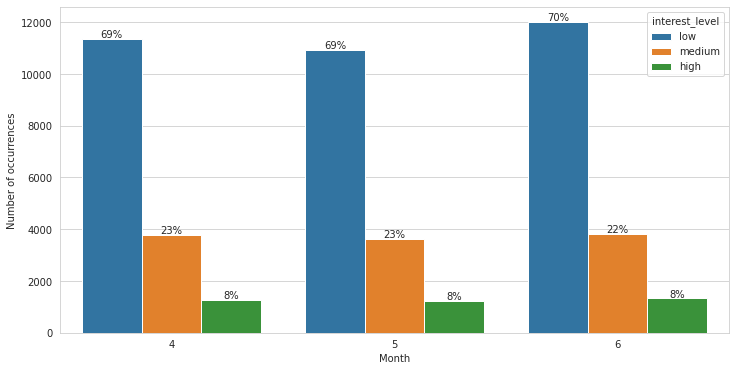

In [34]:
# Iterest per month
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="month", hue="interest_level", hue_order=['low', 'medium', 'high'],
                   data=train);
plt.xlabel('Month');
plt.ylabel('Number of occurrences')

# Adding percents over bars
height = [p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 50,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center")


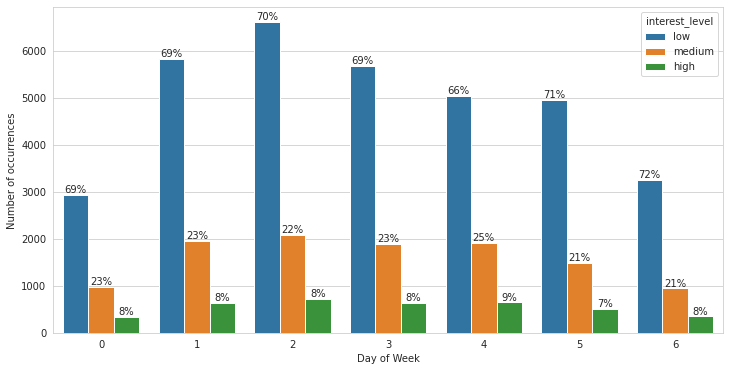

In [35]:
# Iterest per Day of Week
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="day_of_week", hue="interest_level",
                   hue_order=['low', 'medium', 'high'], data=train);
plt.xlabel('Day of Week');
plt.ylabel('Number of occurrences');

### Adding percents over bars
height = [p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 50,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center")

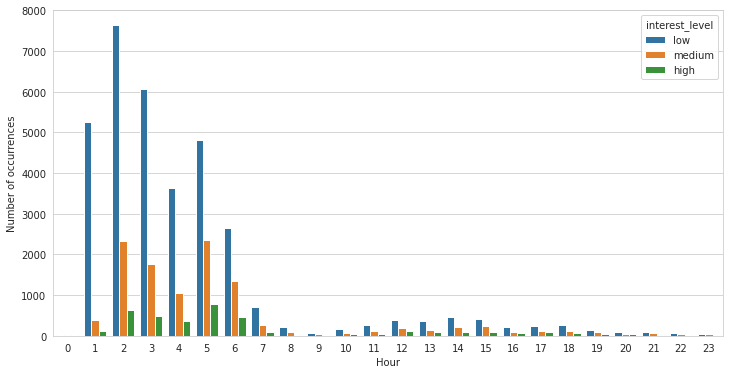

In [36]:
# Iterest per Hour
fig = plt.figure(figsize=(12,6))
sns.countplot(x="hour", hue="interest_level", hue_order=['low', 'medium', 'high'], data=train);
plt.xlabel('Hour');
plt.ylabel('Number of occurrences');

### 'display_address'

In [37]:
# Number of unique Display Addresses
print('Number of Unique Display Addresses is {}'.format(train.display_address.value_counts().shape[0]))

Number of Unique Display Addresses is 8826


In [38]:
# 20 most popular Display Addresses
train.display_address.value_counts().nlargest(20)

Broadway              438
East 34th Street      355
Second Avenue         349
Wall Street           332
West 37th Street      287
West Street           258
First Avenue          244
Gold Street           241
Washington Street     237
York Avenue           228
John Street           214
Water Street          214
East 39th Street      200
East 89th Street      195
West 54th Street      193
Lexington Avenue      189
Fifth Avenue          189
West 42nd Street      184
Christopher Street    180
Third Avenue          178
Name: display_address, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


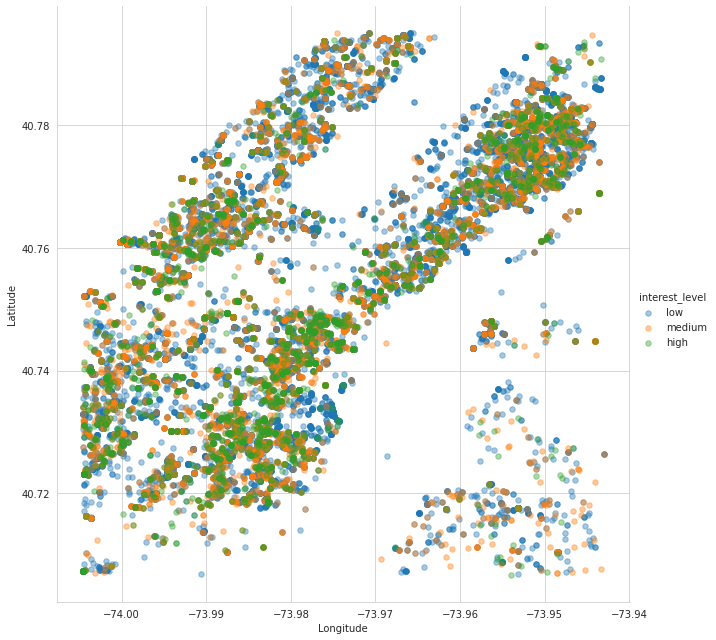

In [39]:
# Rent interest graph of New-York
sns.lmplot(x="longitude", y="latitude", fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], size=9, scatter_kws={'alpha':0.4,'s':30},
           data=train[(train.longitude>train.longitude.quantile(0.1))
                        &(train.longitude<train.longitude.quantile(0.9))
                        &(train.latitude>train.latitude.quantile(0.1))                           
                        &(train.latitude<train.latitude.quantile(0.9))]);
plt.xlabel('Longitude');
plt.ylabel('Latitude');

### 'manager_id’


In [40]:
train.manager_id.value_counts().nlargest(10)

e6472c7237327dd3903b3d6f6a94515a    2533
6e5c10246156ae5bdcd9b487ca99d96a     711
8f5a9c893f6d602f4953fcc0b8e6e9b4     410
62b685cc0d876c3a1a51d63a0d6a8082     402
cb87dadbca78fad02b388dc9e8f25a5b     373
9df32cb8dda19d3222d66e69e258616b     330
b7de4cb395920136663132057fa89d84     320
2aa9bfa5f67ed9997ea341dee8a3a271     316
ad3d8ddc52c7e0859b5c6c7f7949c3bd     305
c9c33695ee2a2f818e9f1d8f7d1c4b39     299
Name: manager_id, dtype: int64

In [41]:
manager_id = train["manager_id"].value_counts()
train["manager_count"] = train["manager_id"].apply(lambda x:manager_id[x]) 
train.head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,room_sum,bed_bath_dif,building_count,year,month,day,day_of_week,hour,manager_count
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,"Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !<br /><br />Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing!<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><p><a website_redacted",145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Dishwasher, Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,"[https://photos.renthop.com/2/7170325_3bb5ac84a5a10227b17b273e79bd77b4.jpg, https://photos.renthop.com/2/7170325_a29a17a771ee6af213966699b05c8ea2.jpg, https://photos.renthop.com/2/7170325_149a898e8760cac1cad56e30cfe98baa.jpg, https://photos.renthop.com/2/7170325_f74a43d781bcc3c5588e61dd47de81ba.jpg, https://photos.renthop.com/2/7170325_e677d9d249ac99abe01aa5454c6e9f59.jpg, https://photos.renthop.com/2/7170325_960ea0e180bf2f15467b68b455db6172.jpg, https://photos.renthop.com/2/7170325_cbc1b8437155dbf7f5d63b3a0b5a45a3.jpg, https://photos.renthop.com/2/7170325_9a9f2adc2ce922e1d5394727efdf64bb.jpg, https://photos.renthop.com/2/7170325_aae2a39d536103eebb282775fab1c315.jpg, https://photos.renthop.com/2/7170325_cd290d0051b9f08e3482195dcbf6b5a6.jpg, https://photos.renthop.com/2/7170325_a2b599da7880eea1edd10c4b04250dc1.jpg, https://photos.renthop.com/2/7170325_6b83fa82d662bcb09733ac3a8a107113.jpg]",2400,145 Borinquen Place,medium,2.0,0.0,5,2016,6,16,3,5,112


In [42]:
manager_id = test["manager_id"].value_counts()
test["manager_count"] = test["manager_id"].apply(lambda x:manager_id[x]) 
test.head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,room_sum,bed_bath_dif,building_count,year,month,day,day_of_week,hour,manager_count
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,"Large with awesome terrace--accessible via bedroom and living room. Unique find in the LES.Apartment Features:-Large terrace via bedroom and living room-Hardwood floors-Newly renovated -Granite counter top-Breakfast Bar-Ample counter space and storage-Dishwasher-Great Lighting Neighborhood Features:-A few blocks from Whole Foods-1 block from the J, Z and M subway-All the restaurants and night life the Lower East Side is known for (Hotel Chantel, DL, Pianos)Call/txt/Email James to set up a showing:kagglemanager@renthop.com<br /><br /><br /><br /><br /><br /><p><a website_redacted",Suffolk Street,"[Elevator, Laundry in Building, Laundry in Unit, Dishwasher, Hardwood Floors, Outdoor Space]",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,"[https://photos.renthop.com/2/7142618_1c45a2c8f45e649b9ee77681cc7ca438.jpg, https://photos.renthop.com/2/7142618_2a0268ff01f834c1039027a04e54edf4.jpg, https://photos.renthop.com/2/7142618_1645edaeb3892d35c190356eeb16bd75.jpg, https://photos.renthop.com/2/7142618_ca5c03339bd1f021b94da72af7356bca.jpg, https://photos.renthop.com/2/7142618_b129d432a96a0ad419f1af430f4a20ff.jpg, https://photos.renthop.com/2/7142618_dd3c3651b991455d3ed7403766c6941d.jpg, https://photos.renthop.com/2/7142618_4ddef2aee0c343f5a86da7113f9336fc.jpg, https://photos.renthop.com/2/7142618_6c51aec64570affecc573efbdc4453ca.jpg]",2950,99 Suffolk Street,2.0,0.0,5,2016,6,11,5,5,38


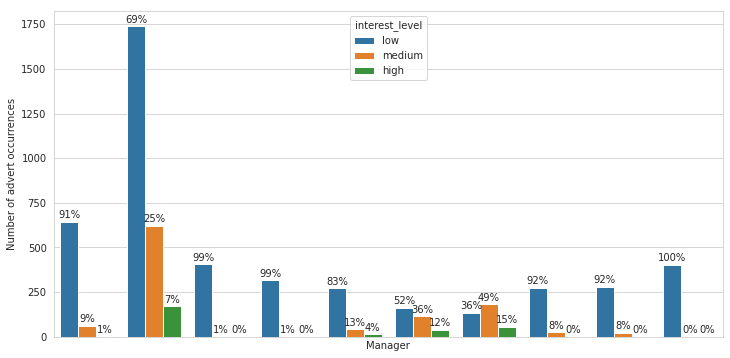

In [43]:
# Let's get a list of top 10 managers
top10managers = train.manager_id.value_counts().nlargest(10).index.tolist()
# ...and plot number of different Interest Level rental adverts for each of them
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="manager_id", hue="interest_level",
data=train[train.manager_id.isin(top10managers)]);
plt.xlabel('Manager');
plt.ylabel('Number of advert occurrences');
### Manager_ids are too long. Let's remove them
plt.tick_params(
axis='x', # changes apply to the x-axis
which='both', # both major and minor ticks are affected
bottom='off', # ticks along the bottom edge are off
top='off', # ticks along the top edge are off
labelbottom='off');
plt.xticks([])
# Adding percents over bars
height = [0 if np.isnan(p.get_height()) else p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 20,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center")


### 'photos'

In [44]:
# count of photos 
train["num_photos"] = train["photos"].apply(len)

train.head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,room_sum,bed_bath_dif,building_count,year,month,day,day_of_week,hour,manager_count,num_photos
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,"Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !<br /><br />Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing!<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><p><a website_redacted",145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Dishwasher, Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,"[https://photos.renthop.com/2/7170325_3bb5ac84a5a10227b17b273e79bd77b4.jpg, https://photos.renthop.com/2/7170325_a29a17a771ee6af213966699b05c8ea2.jpg, https://photos.renthop.com/2/7170325_149a898e8760cac1cad56e30cfe98baa.jpg, https://photos.renthop.com/2/7170325_f74a43d781bcc3c5588e61dd47de81ba.jpg, https://photos.renthop.com/2/7170325_e677d9d249ac99abe01aa5454c6e9f59.jpg, https://photos.renthop.com/2/7170325_960ea0e180bf2f15467b68b455db6172.jpg, https://photos.renthop.com/2/7170325_cbc1b8437155dbf7f5d63b3a0b5a45a3.jpg, https://photos.renthop.com/2/7170325_9a9f2adc2ce922e1d5394727efdf64bb.jpg, https://photos.renthop.com/2/7170325_aae2a39d536103eebb282775fab1c315.jpg, https://photos.renthop.com/2/7170325_cd290d0051b9f08e3482195dcbf6b5a6.jpg, https://photos.renthop.com/2/7170325_a2b599da7880eea1edd10c4b04250dc1.jpg, https://photos.renthop.com/2/7170325_6b83fa82d662bcb09733ac3a8a107113.jpg]",2400,145 Borinquen Place,medium,2.0,0.0,5,2016,6,16,3,5,112,12


In [45]:
# count of photos 
test["num_photos"] = test["photos"].apply(len)
test.head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,room_sum,bed_bath_dif,building_count,year,month,day,day_of_week,hour,manager_count,num_photos
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,"Large with awesome terrace--accessible via bedroom and living room. Unique find in the LES.Apartment Features:-Large terrace via bedroom and living room-Hardwood floors-Newly renovated -Granite counter top-Breakfast Bar-Ample counter space and storage-Dishwasher-Great Lighting Neighborhood Features:-A few blocks from Whole Foods-1 block from the J, Z and M subway-All the restaurants and night life the Lower East Side is known for (Hotel Chantel, DL, Pianos)Call/txt/Email James to set up a showing:kagglemanager@renthop.com<br /><br /><br /><br /><br /><br /><p><a website_redacted",Suffolk Street,"[Elevator, Laundry in Building, Laundry in Unit, Dishwasher, Hardwood Floors, Outdoor Space]",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,"[https://photos.renthop.com/2/7142618_1c45a2c8f45e649b9ee77681cc7ca438.jpg, https://photos.renthop.com/2/7142618_2a0268ff01f834c1039027a04e54edf4.jpg, https://photos.renthop.com/2/7142618_1645edaeb3892d35c190356eeb16bd75.jpg, https://photos.renthop.com/2/7142618_ca5c03339bd1f021b94da72af7356bca.jpg, https://photos.renthop.com/2/7142618_b129d432a96a0ad419f1af430f4a20ff.jpg, https://photos.renthop.com/2/7142618_dd3c3651b991455d3ed7403766c6941d.jpg, https://photos.renthop.com/2/7142618_4ddef2aee0c343f5a86da7113f9336fc.jpg, https://photos.renthop.com/2/7142618_6c51aec64570affecc573efbdc4453ca.jpg]",2950,99 Suffolk Street,2.0,0.0,5,2016,6,11,5,5,38,8


### 

### price

In [46]:
# Value Counts
train['price'].value_counts()

2500      1106
3200       881
3000       840
2700       777
2400       772
          ... 
5753         1
2417         1
9625         1
5433         1
135000       1
Name: price, Length: 2808, dtype: int64

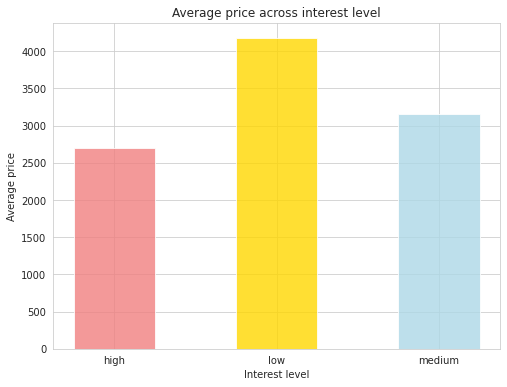

In [47]:
# Price exploration
prices=train.groupby('interest_level', as_index=False)['price'].mean()
colors = ['lightcoral','gold','lightblue']

fig=plt.figure(figsize=(8,6))
plt.bar(prices.interest_level, prices.price, color=colors, width=0.5, alpha=0.8)
#set titles
plt.xlabel('Interest level')
plt.ylabel('Average price')
plt.title('Average price across interest level')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


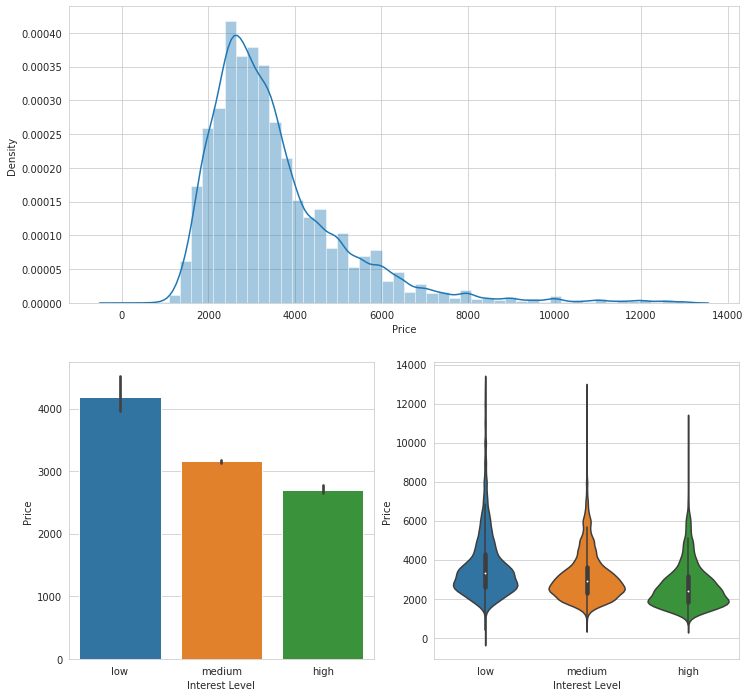

In [48]:
# Price exploration
fig = plt.figure(figsize=(12,12))
# Price distribution
sns.distplot(train.price[train.price<=train.price.quantile(0.99)], ax=plt.subplot(211));
plt.xlabel('Price');
plt.ylabel('Density');

# Average Price per Interest Level
sns.barplot(x="interest_level", y="price", order=['low', 'medium', 'high'],
            data=train, ax=plt.subplot(223));
plt.xlabel('Interest Level');
plt.ylabel('Price');

# Violinplot of price for every Interest Level
sns.violinplot(x="interest_level", y="price", order=['low', 'medium', 'high'],
               data=train[train.price<=train.price.quantile(0.99)],
               ax=plt.subplot(224));
plt.xlabel('Interest Level');
plt.ylabel('Price');

### 'description’

In [49]:
train['description'].iloc[0]

'Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !<br /><br />Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing!<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><p><a  website_redacted '

In [50]:
# REMOVE UNNECESSARY WORDS FROM DESCRIPTION (УДАЛИТЬ НЕНУЖНЫЕ СЛОВА ИЗ ОПИСАНИЯ)
train['description'] = train['description'].apply(lambda x: x.replace("<br />", ""))
train['description'] = train['description'].apply(lambda x: x.replace("br", ""))
train['description'] = train['description'].apply(lambda x: x.replace("<p><a", ""))
train['description'].iloc[0]


'Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing!  website_redacted '

In [51]:
# REMOVE UNNECESSARY WORDS FROM DESCRIPTION (УДАЛИТЬ НЕНУЖНЫЕ СЛОВА ИЗ ОПИСАНИЯ)
test['description'] = test['description'].apply(lambda x: x.replace("<br />", ""))
test['description'] = test['description'].apply(lambda x: x.replace("br", ""))
test['description'] = test['description'].apply(lambda x: x.replace("<p><a", ""))
test['description'].iloc[0]

'Large with awesome terrace--accessible via bedroom and living room. Unique find in the LES.Apartment Features:-Large terrace via bedroom and living room-Hardwood floors-Newly renovated -Granite counter top-Breakfast Bar-Ample counter space and storage-Dishwasher-Great Lighting Neighborhood Features:-A few blocks from Whole Foods-1 block from the J, Z and M subway-All the restaurants and night life the Lower East Side is known for (Hotel Chantel, DL, Pianos)Call/txt/Email James to set up a showing:kagglemanager@renthop.com  website_redacted '

### 'features'

In [52]:
# count of "features" 
train["num_features"] = train["features"].apply(len)
train.head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,room_sum,bed_bath_dif,building_count,year,month,day,day_of_week,hour,manager_count,num_photos,num_features
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,"Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing! website_redacted",145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Dishwasher, Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,"[https://photos.renthop.com/2/7170325_3bb5ac84a5a10227b17b273e79bd77b4.jpg, https://photos.renthop.com/2/7170325_a29a17a771ee6af213966699b05c8ea2.jpg, https://photos.renthop.com/2/7170325_149a898e8760cac1cad56e30cfe98baa.jpg, https://photos.renthop.com/2/7170325_f74a43d781bcc3c5588e61dd47de81ba.jpg, https://photos.renthop.com/2/7170325_e677d9d249ac99abe01aa5454c6e9f59.jpg, https://photos.renthop.com/2/7170325_960ea0e180bf2f15467b68b455db6172.jpg, https://photos.renthop.com/2/7170325_cbc1b8437155dbf7f5d63b3a0b5a45a3.jpg, https://photos.renthop.com/2/7170325_9a9f2adc2ce922e1d5394727efdf64bb.jpg, https://photos.renthop.com/2/7170325_aae2a39d536103eebb282775fab1c315.jpg, https://photos.renthop.com/2/7170325_cd290d0051b9f08e3482195dcbf6b5a6.jpg, https://photos.renthop.com/2/7170325_a2b599da7880eea1edd10c4b04250dc1.jpg, https://photos.renthop.com/2/7170325_6b83fa82d662bcb09733ac3a8a107113.jpg]",2400,145 Borinquen Place,medium,2.0,0.0,5,2016,6,16,3,5,112,12,7


In [53]:
# count of "features" 
test["num_features"] = test["features"].apply(len)
test.head(1)


,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,room_sum,bed_bath_dif,building_count,year,month,day,day_of_week,hour,manager_count,num_photos,num_features
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,"Large with awesome terrace--accessible via bedroom and living room. Unique find in the LES.Apartment Features:-Large terrace via bedroom and living room-Hardwood floors-Newly renovated -Granite counter top-Breakfast Bar-Ample counter space and storage-Dishwasher-Great Lighting Neighborhood Features:-A few blocks from Whole Foods-1 block from the J, Z and M subway-All the restaurants and night life the Lower East Side is known for (Hotel Chantel, DL, Pianos)Call/txt/Email James to set up a showing:kagglemanager@renthop.com website_redacted",Suffolk Street,"[Elevator, Laundry in Building, Laundry in Unit, Dishwasher, Hardwood Floors, Outdoor Space]",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,"[https://photos.renthop.com/2/7142618_1c45a2c8f45e649b9ee77681cc7ca438.jpg, https://photos.renthop.com/2/7142618_2a0268ff01f834c1039027a04e54edf4.jpg, https://photos.renthop.com/2/7142618_1645edaeb3892d35c190356eeb16bd75.jpg, https://photos.renthop.com/2/7142618_ca5c03339bd1f021b94da72af7356bca.jpg, https://photos.renthop.com/2/7142618_b129d432a96a0ad419f1af430f4a20ff.jpg, https://photos.renthop.com/2/7142618_dd3c3651b991455d3ed7403766c6941d.jpg, https://photos.renthop.com/2/7142618_4ddef2aee0c343f5a86da7113f9336fc.jpg, https://photos.renthop.com/2/7142618_6c51aec64570affecc573efbdc4453ca.jpg]",2950,99 Suffolk Street,2.0,0.0,5,2016,6,11,5,5,38,8,6


In [54]:
# CONVERT LOWER ALL OF WORDS
train[["features"]] = train[["features"]].apply(
    lambda _: [list(map(str.strip, map(str.lower, x))) for x in _])
train[["features"]]


,features
4,"[dining room, pre-war, laundry in building, dishwasher, hardwood floors, dogs allowed, cats allowed]"
6,"[doorman, elevator, laundry in building, dishwasher, hardwood floors, no fee]"
9,"[doorman, elevator, laundry in building, laundry in unit, dishwasher, hardwood floors]"
10,[]
15,"[doorman, elevator, fitness center, laundry in building]"
...,...
124000,"[elevator, dishwasher, hardwood floors]"
124002,"[common outdoor space, cats allowed, dogs allowed, no fee, doorman, elevator, laundry in building]"
124004,"[dining room, elevator, pre-war, laundry in building, laundry in unit, dishwasher, hardwood floors, wheelchair access, no fee, dogs allowed, cats allowed]"
124008,"[pre-war, laundry in unit, dishwasher, no fee, outdoor space]"


In [55]:
# CONVERT LOWER ALL OF WORDS
test[["features"]] = test[["features"]].apply(
    lambda _: [list(map(str.strip, map(str.lower, x))) for x in _])
test[["features"]]


,features
0,"[elevator, laundry in building, laundry in unit, dishwasher, hardwood floors, outdoor space]"
1,"[pre-war, dogs allowed, cats allowed]"
2,"[pre-war, dogs allowed, cats allowed]"
3,"[hardwood floors, dogs allowed, cats allowed]"
5,"[roof deck, doorman, elevator, fitness center, pre-war, laundry in building, high speed internet, wheelchair access, dogs allowed, cats allowed]"
...,...
124003,[]
124005,"[doorman, elevator, laundry in building, dishwasher, hardwood floors, no fee, dogs allowed, cats allowed]"
124006,"[dogs allowed, cats allowed]"
124007,"[doorman, elevator, cats allowed, dogs allowed]"


### 'features'  MOST FREQUENT FEATURES EXTRACTION  (ИЗВЛЕЧЕНИЕ НАИБОЛЕЕ ЧАСТОТЫХ ФУНКЦИЙ)

In [56]:
feature_value_train = train['features'].tolist()
feature_value_test = test['features'].tolist()


In [57]:
feature_lst_train = []
for i in range(len(feature_value_train)):
    feature_lst_train += feature_value_train[i]
    
uniq_feature_train = list(set(feature_lst_train))

# print(uniq_feature) #all unique features
len(uniq_feature_train)
    
    

1293

In [58]:
feature_lst_test = []
for i in range(len(feature_value_test)):
    feature_lst_test += feature_value_test[i]
    
uniq_feature_test = list(set(feature_lst_test))

# print(uniq_feature) #all unique features
len(uniq_feature_test)

1760

In [59]:
# see the frequency of each feature
import collections
def most_common(lst):
    features = collections.Counter(lst)
    feature_value = features.keys()
    frequency = features.values()
    data = [('feature_value', feature_value),
            ('frequency', frequency),]    
    df = pd.DataFrame.from_dict(dict(data))
    return df.sort_values(by = 'frequency', ascending = False)

df_features_train = most_common(feature_lst_train)

df_features_test = most_common(feature_lst_test)

df_features_train


,feature_value,frequency
8,elevator,26273
4,hardwood floors,23558
6,cats allowed,23540
5,dogs allowed,22035
7,doorman,20967
...,...,...
734,** central park steal! * massive studio supreme * gut renovated * walls of windows * elev/lndry bldg **,1
251,12th st & 3rd ave,1
736,full kitchen,1
737,new stainless appliances,1


In [60]:
df_features_train.head(20)


,feature_value,frequency
8,elevator,26273
4,hardwood floors,23558
6,cats allowed,23540
5,dogs allowed,22035
7,doorman,20967
3,dishwasher,20806
2,laundry in building,18944
9,no fee,18079
11,fitness center,13257
10,laundry in unit,9435


In [61]:
df_features_test.head(20)

,feature_value,frequency
0,elevator,39560
8,cats allowed,35654
4,hardwood floors,35597
7,dogs allowed,33172
10,doorman,31538
3,dishwasher,31229
1,laundry in building,28539
14,no fee,27371
11,fitness center,20163
2,laundry in unit,14317


In [62]:
def newColumn(name, df, series):
    feature = pd.Series(0,df.index,name = name)# data : 0
    for row,word in enumerate(series):
        if name in word:
            feature.iloc[row] = 1
    df[name] = feature # feature : series ; value in series : 1 or 0
    return df

# select features based on frequency
facilities = [
'elevator', 'cats allowed', 'hardwood floors', 'dogs allowed', 'doorman', 'dishwasher', 'no fee', 'laundry in building', 'fitness center',
'laundry in unit', 'pre-war', 'roof deck', 'outdoor space','dining room', 'high speed internet', 'balcony', 'swimming pool',
'new construction', 'terrace']
for name in facilities:
    train = newColumn(name, train, train['features'])
    test = newColumn(name, test, test['features'])
train.head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,room_sum,bed_bath_dif,building_count,year,month,day,day_of_week,hour,manager_count,num_photos,num_features,elevator,cats allowed,hardwood floors,dogs allowed,doorman,dishwasher,no fee,laundry in building,fitness center,laundry in unit,pre-war,roof deck,outdoor space,dining room,high speed internet,balcony,swimming pool,new construction,terrace
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,"Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing! website_redacted",145 Borinquen Place,"[dining room, pre-war, laundry in building, dishwasher, hardwood floors, dogs allowed, cats allowed]",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,"[https://photos.renthop.com/2/7170325_3bb5ac84a5a10227b17b273e79bd77b4.jpg, https://photos.renthop.com/2/7170325_a29a17a771ee6af213966699b05c8ea2.jpg, https://photos.renthop.com/2/7170325_149a898e8760cac1cad56e30cfe98baa.jpg, https://photos.renthop.com/2/7170325_f74a43d781bcc3c5588e61dd47de81ba.jpg, https://photos.renthop.com/2/7170325_e677d9d249ac99abe01aa5454c6e9f59.jpg, https://photos.renthop.com/2/7170325_960ea0e180bf2f15467b68b455db6172.jpg, https://photos.renthop.com/2/7170325_cbc1b8437155dbf7f5d63b3a0b5a45a3.jpg, https://photos.renthop.com/2/7170325_9a9f2adc2ce922e1d5394727efdf64bb.jpg, https://photos.renthop.com/2/7170325_aae2a39d536103eebb282775fab1c315.jpg, https://photos.renthop.com/2/7170325_cd290d0051b9f08e3482195dcbf6b5a6.jpg, https://photos.renthop.com/2/7170325_a2b599da7880eea1edd10c4b04250dc1.jpg, https://photos.renthop.com/2/7170325_6b83fa82d662bcb09733ac3a8a107113.jpg]",2400,145 Borinquen Place,medium,2.0,0.0,5,2016,6,16,3,5,112,12,7,0,1,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0


In [63]:
test.head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,room_sum,bed_bath_dif,building_count,year,month,day,day_of_week,hour,manager_count,num_photos,num_features,elevator,cats allowed,hardwood floors,dogs allowed,doorman,dishwasher,no fee,laundry in building,fitness center,laundry in unit,pre-war,roof deck,outdoor space,dining room,high speed internet,balcony,swimming pool,new construction,terrace
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,"Large with awesome terrace--accessible via bedroom and living room. Unique find in the LES.Apartment Features:-Large terrace via bedroom and living room-Hardwood floors-Newly renovated -Granite counter top-Breakfast Bar-Ample counter space and storage-Dishwasher-Great Lighting Neighborhood Features:-A few blocks from Whole Foods-1 block from the J, Z and M subway-All the restaurants and night life the Lower East Side is known for (Hotel Chantel, DL, Pianos)Call/txt/Email James to set up a showing:kagglemanager@renthop.com website_redacted",Suffolk Street,"[elevator, laundry in building, laundry in unit, dishwasher, hardwood floors, outdoor space]",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,"[https://photos.renthop.com/2/7142618_1c45a2c8f45e649b9ee77681cc7ca438.jpg, https://photos.renthop.com/2/7142618_2a0268ff01f834c1039027a04e54edf4.jpg, https://photos.renthop.com/2/7142618_1645edaeb3892d35c190356eeb16bd75.jpg, https://photos.renthop.com/2/7142618_ca5c03339bd1f021b94da72af7356bca.jpg, https://photos.renthop.com/2/7142618_b129d432a96a0ad419f1af430f4a20ff.jpg, https://photos.renthop.com/2/7142618_dd3c3651b991455d3ed7403766c6941d.jpg, https://photos.renthop.com/2/7142618_4ddef2aee0c343f5a86da7113f9336fc.jpg, https://photos.renthop.com/2/7142618_6c51aec64570affecc573efbdc4453ca.jpg]",2950,99 Suffolk Street,2.0,0.0,5,2016,6,11,5,5,38,8,6,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0


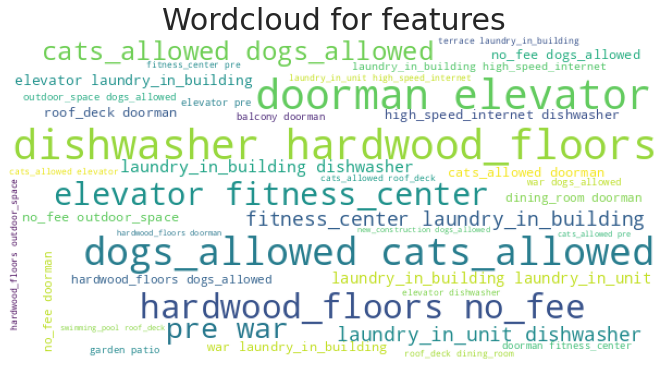

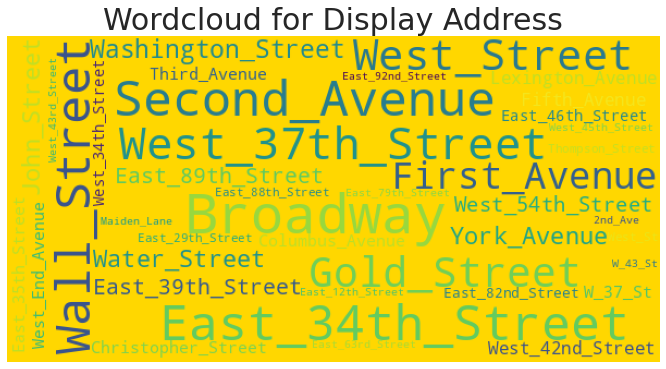

In [64]:
#WORDCLOUD FOR DESCRIPTION AND DISPLAY ADDRESS
#Preprocessing
text = ''
text_da = ''


for ind, row in train.iterrows():
    for feature in row['features']:
        text = " ".join([text, "_".join(feature.strip().split(" "))])
    text_da = " ".join([text_da,"_".join(row['display_address'].strip().split(" "))])
    
text = text.strip()
text_da = text_da.strip()



# wordcloud for features
plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for features", fontsize=30)
plt.axis("off")
plt.show()




# wordcloud for display address
plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='gold', width=600, height=300, max_font_size=50, max_words=40).generate(text_da)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for Display Address", fontsize=30)
plt.axis("off")
plt.show()






# Feature Selection  (Выбор функции)

In [65]:
train.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level',
       'room_sum', 'bed_bath_dif', 'building_count', 'year', 'month', 'day',
       'day_of_week', 'hour', 'manager_count', 'num_photos', 'num_features',
       'elevator', 'cats allowed', 'hardwood floors', 'dogs allowed',
       'doorman', 'dishwasher', 'no fee', 'laundry in building',
       'fitness center', 'laundry in unit', 'pre-war', 'roof deck',
       'outdoor space', 'dining room', 'high speed internet', 'balcony',
       'swimming pool', 'new construction', 'terrace'],
      dtype='object')

In [66]:
train.isnull().sum()

bathrooms              0
bedrooms               0
building_id            0
created                0
description            0
display_address        0
features               0
latitude               0
listing_id             0
longitude              0
manager_id             0
photos                 0
price                  0
street_address         0
interest_level         0
room_sum               0
bed_bath_dif           0
building_count         0
year                   0
month                  0
day                    0
day_of_week            0
hour                   0
manager_count          0
num_photos             0
num_features           0
elevator               0
cats allowed           0
hardwood floors        0
dogs allowed           0
doorman                0
dishwasher             0
no fee                 0
laundry in building    0
fitness center         0
laundry in unit        0
pre-war                0
roof deck              0
outdoor space          0
dining room            0


In [67]:
test.isnull().sum()

bathrooms              0
bedrooms               0
building_id            0
created                0
description            0
display_address        0
features               0
latitude               0
listing_id             0
longitude              0
manager_id             0
photos                 0
price                  0
street_address         0
room_sum               0
bed_bath_dif           0
building_count         0
year                   0
month                  0
day                    0
day_of_week            0
hour                   0
manager_count          0
num_photos             0
num_features           0
elevator               0
cats allowed           0
hardwood floors        0
dogs allowed           0
doorman                0
dishwasher             0
no fee                 0
laundry in building    0
fitness center         0
laundry in unit        0
pre-war                0
roof deck              0
outdoor space          0
dining room            0
high speed internet    0


In [68]:
# LABEL ECONDING FOR CATEGORICAL VARIABLES
categorical = ["display_address", "manager_id", "building_id", "street_address"]
for f in categorical:
        if train[f].dtype=='object':
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(train[f].values) + list(test[f].values))
            train[f] = lbl.transform(list(train[f].values))
            test[f] = lbl.transform(list(test[f].values))

In [69]:
X = train[['bathrooms', 'bedrooms', 'latitude',  'longitude', 'price', 
       'room_sum', 'bed_bath_dif','display_address','manager_id', 'building_id',
       'year', 'month', 'day', 'day_of_week', 'hour','street_address',
       'building_count', 'manager_count', 'num_photos', 
        'num_features', 'elevator', 'cats allowed', 'hardwood floors', 'dogs allowed',
       'doorman', 'dishwasher', 'no fee', 'laundry in building',
       'fitness center', 'laundry in unit', 'pre-war', 'roof deck',
       'outdoor space', 'dining room', 'high speed internet', 'balcony',
       'swimming pool', 'new construction', 'terrace']]


In [70]:
TestX = test[['bathrooms', 'bedrooms',  'latitude',  'longitude', 'price',  
       'room_sum', 'bed_bath_dif', 'display_address','manager_id','building_id',
       'year', 'month', 'day', 'day_of_week', 'hour','street_address',
       'building_count', 'manager_count', 'num_photos', 'num_features',
       'elevator', 'cats allowed', 'hardwood floors', 'dogs allowed',
       'doorman', 'dishwasher', 'no fee', 'laundry in building',
       'fitness center', 'laundry in unit', 'pre-war', 'roof deck',
       'outdoor space', 'dining room', 'high speed internet', 'balcony',
       'swimming pool', 'new construction', 'terrace']]

In [71]:
train['target'] = train['interest_level'].map({'high':0, 'medium':1, 'low':2})
train['target']

4         1
6         2
9         1
10        1
15        2
         ..
124000    2
124002    1
124004    1
124008    1
124009    0
Name: target, Length: 49352, dtype: int64

# Classification

### XGBOOST (алгоритм градиентного бустинга на деревьях)

In [72]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import make_scorer, f1_score, accuracy_score, mean_absolute_error, confusion_matrix

In [73]:

y = train.target

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15,random_state = 42,stratify = y)


# Импорт XGBoost и создание необходимых объектов.
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)


In [74]:
kf = KFold(n_splits=5, shuffle=False)
X_train = X_train.values
y_train = y_train.values

scores = []

for train, test in kf.split(X_train, y_train):
    model = XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth = 10)
    model.fit(X_train[train], y_train[train])
    scores.append(model.score(X_train[test], y_train[test]))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:43:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:47:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [75]:
def objective(trial):
    params = {
        'booster':trial.suggest_categorical('booster', ['gbtree', 'dart', 'gblinear']),
        'learning_rate':trial.suggest_loguniform("learning_rate", 0.01, 0.1),
        'max_depth':trial.suggest_int("max_depth", 3, 11),
        'subsample':trial.suggest_uniform("subsample", 0.0, 1.0),
        'colsample_bytree':trial.suggest_uniform("colsample_bytree", 0.0, 1.0),
    }

    model = XGBClassifier(**params)
    cv = KFold(n_splits=3, shuffle=True, random_state=None)
    scorer = make_scorer(f1_score, greater_is_better=True)
    
    bst = xgb.train(params, dtrain)
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    f1_scores = f1_score(y_test, pred_labels, average='micro')
    return f1_scores

In [76]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

[I 2022-02-02 17:54:47,662] A new study created in memory with name: no-name-de7ae3a5-854a-4132-a35c-7209f9ee75f5
[I 2022-02-02 17:54:47,870] Trial 0 finished with value: 0.22747534783196002 and parameters: {'booster': 'gbtree', 'learning_rate': 0.05887792113680616, 'max_depth': 9, 'subsample': 0.5971695202991122, 'colsample_bytree': 0.01182428472866981}. Best is trial 0 with value: 0.22747534783196002.
[I 2022-02-02 17:54:47,982] Trial 1 finished with value: 0.35228961231933 and parameters: {'booster': 'gblinear', 'learning_rate': 0.010137210029382953, 'max_depth': 3, 'subsample': 0.1996487953804631, 'colsample_bytree': 0.5209011787784551}. Best is trial 1 with value: 0.35228961231933.


[17:54:47] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:48,142] Trial 2 finished with value: 0.22747534783196002 and parameters: {'booster': 'gbtree', 'learning_rate': 0.07206741553074276, 'max_depth': 10, 'subsample': 0.9246258573432984, 'colsample_bytree': 0.041943763858268035}. Best is trial 1 with value: 0.35228961231933.
[I 2022-02-02 17:54:48,245] Trial 3 finished with value: 0.6021883020397136 and parameters: {'booster': 'gblinear', 'learning_rate': 0.053979459588916645, 'max_depth': 4, 'subsample': 0.4988616408172314, 'colsample_bytree': 0.8695688809254463}. Best is trial 3 with value: 0.6021883020397136.


[17:54:48] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:48,861] Trial 4 finished with value: 0.22761042820478183 and parameters: {'booster': 'dart', 'learning_rate': 0.020247515396831763, 'max_depth': 9, 'subsample': 0.4112943860861439, 'colsample_bytree': 0.4129543659696865}. Best is trial 3 with value: 0.6021883020397136.
[I 2022-02-02 17:54:48,964] Trial 5 finished with value: 0.4338781575037147 and parameters: {'booster': 'gblinear', 'learning_rate': 0.013813740004875502, 'max_depth': 7, 'subsample': 0.5590576022518431, 'colsample_bytree': 0.881114707914773}. Best is trial 3 with value: 0.6021883020397136.
[I 2022-02-02 17:54:49,067] Trial 6 finished with value: 0.5865189787923815 and parameters: {'booster': 'gblinear', 'learning_rate': 0.04268763353797468, 'max_depth': 11, 'subsample': 0.3130065244607222, 'colsample_bytree': 0.23660709073849673}. Best is trial 3 with value: 0.6021883020397136.


[17:54:48] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:48] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:49,250] Trial 7 finished with value: 0.22747534783196002 and parameters: {'booster': 'gbtree', 'learning_rate': 0.010463178612476398, 'max_depth': 4, 'subsample': 0.04333099995792622, 'colsample_bytree': 0.5703699615155923}. Best is trial 3 with value: 0.6021883020397136.
[I 2022-02-02 17:54:49,741] Trial 8 finished with value: 0.22747534783196002 and parameters: {'booster': 'dart', 'learning_rate': 0.020957951093020087, 'max_depth': 5, 'subsample': 0.7754230762539399, 'colsample_bytree': 0.844744600537708}. Best is trial 3 with value: 0.6021883020397136.
[I 2022-02-02 17:54:50,238] Trial 9 finished with value: 0.22896123193300016 and parameters: {'booster': 'gbtree', 'learning_rate': 0.019683326659494783, 'max_depth': 9, 'subsample': 0.281385589842711, 'colsample_bytree': 0.4960296130280313}. Best is trial 3 with value: 0.6021883020397136.
[I 2022-02-02 17:54:50,357] Trial 10 finished with value: 0.6223152775901661 and parameters: {'booster': 'gblinear', 'learning_

[17:54:50] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:50] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:50,478] Trial 11 finished with value: 0.6190733486424422 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08549992653148039, 'max_depth': 6, 'subsample': 0.688151122254496, 'colsample_bytree': 0.9644023590964914}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:50,599] Trial 12 finished with value: 0.6215047953532352 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09819074701254307, 'max_depth': 6, 'subsample': 0.7538814370811571, 'colsample_bytree': 0.9972288543686867}. Best is trial 10 with value: 0.6223152775901661.


[17:54:50] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:50] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:50,726] Trial 13 finished with value: 0.6221801972173443 and parameters: {'booster': 'gblinear', 'learning_rate': 0.0975142176698489, 'max_depth': 7, 'subsample': 0.9255600374820165, 'colsample_bytree': 0.7287707445770875}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:50,850] Trial 14 finished with value: 0.57976496015129 and parameters: {'booster': 'gblinear', 'learning_rate': 0.037252187800984736, 'max_depth': 7, 'subsample': 0.993288376113597, 'colsample_bytree': 0.7037430685593518}. Best is trial 10 with value: 0.6223152775901661.


[17:54:50] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:50] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:50,981] Trial 15 finished with value: 0.6100229636633797 and parameters: {'booster': 'gblinear', 'learning_rate': 0.06788411027469189, 'max_depth': 6, 'subsample': 0.8698477116219456, 'colsample_bytree': 0.7197911396697481}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:51,733] Trial 16 finished with value: 0.2311225178981494 and parameters: {'booster': 'dart', 'learning_rate': 0.029529394632104224, 'max_depth': 8, 'subsample': 0.8315722457665553, 'colsample_bytree': 0.7140330369258718}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:51,863] Trial 17 finished with value: 0.6219100364717006 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09665320912891631, 'max_depth': 8, 'subsample': 0.6615082757233057, 'colsample_bytree': 0.7805696554812621}. Best is trial 10 with value: 0.6223152775901661.


[17:54:51] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:51] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:51,991] Trial 18 finished with value: 0.5936782385519384 and parameters: {'booster': 'gblinear', 'learning_rate': 0.04736471893427247, 'max_depth': 5, 'subsample': 0.9840456014752094, 'colsample_bytree': 0.6079103796743882}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:52,769] Trial 19 finished with value: 0.23382412535458597 and parameters: {'booster': 'dart', 'learning_rate': 0.07516714652145584, 'max_depth': 7, 'subsample': 0.7150075258767626, 'colsample_bytree': 0.9370860746033979}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:52,927] Trial 20 finished with value: 0.5616641901931649 and parameters: {'booster': 'gblinear', 'learning_rate': 0.030488385242647194, 'max_depth': 5, 'subsample': 0.8485529708900265, 'colsample_bytree': 0.3543376614292291}. Best is trial 10 with value: 0.6223152775901661.


[17:54:52] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:52] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:53,131] Trial 21 finished with value: 0.6217749560988788 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09998085032001974, 'max_depth': 8, 'subsample': 0.6514387881068081, 'colsample_bytree': 0.793848399012543}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:53,256] Trial 22 finished with value: 0.6179927056598676 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08395515716296346, 'max_depth': 8, 'subsample': 0.5027226884878493, 'colsample_bytree': 0.7908249225305714}. Best is trial 10 with value: 0.6223152775901661.


[17:54:53] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:53] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:53,378] Trial 23 finished with value: 0.6085370795623396 and parameters: {'booster': 'gblinear', 'learning_rate': 0.062331766281057265, 'max_depth': 7, 'subsample': 0.6245250026328241, 'colsample_bytree': 0.6417030762212274}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:53,504] Trial 24 finished with value: 0.6192084290152641 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08537694694335853, 'max_depth': 8, 'subsample': 0.7775381882634301, 'colsample_bytree': 0.7841068195886065}. Best is trial 10 with value: 0.6223152775901661.


[17:54:53] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:53] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:53,628] Trial 25 finished with value: 0.6028637039038228 and parameters: {'booster': 'gblinear', 'learning_rate': 0.05291602852727804, 'max_depth': 6, 'subsample': 0.8833734703598202, 'colsample_bytree': 0.9071637116487994}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:53,748] Trial 26 finished with value: 0.6206943131163042 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09475813677183002, 'max_depth': 11, 'subsample': 0.5029192009837262, 'colsample_bytree': 0.6695119027649196}. Best is trial 10 with value: 0.6223152775901661.


[17:54:53] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:53] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:53,868] Trial 27 finished with value: 0.6186681075239767 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08009812434557104, 'max_depth': 10, 'subsample': 0.9328550090870354, 'colsample_bytree': 0.9951987591470712}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:54,496] Trial 28 finished with value: 0.23328380386329867 and parameters: {'booster': 'gbtree', 'learning_rate': 0.06647638025849563, 'max_depth': 7, 'subsample': 0.689173803413278, 'colsample_bytree': 0.7964228364604108}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:55,485] Trial 29 finished with value: 0.23233824125354585 and parameters: {'booster': 'dart', 'learning_rate': 0.059082003908790315, 'max_depth': 9, 'subsample': 0.5751008971555198, 'colsample_bytree': 0.8385976746892241}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:56,403] Trial 30 finished with value: 0.2339592057274078 and parameters: {'booster': 'gbtree', 'learn

[17:54:56] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:56] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:56,644] Trial 32 finished with value: 0.6200189112521951 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08979438277397804, 'max_depth': 8, 'subsample': 0.6040624513980842, 'colsample_bytree': 0.9340732008629169}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:56,762] Trial 33 finished with value: 0.6167769823044712 and parameters: {'booster': 'gblinear', 'learning_rate': 0.07462740139495706, 'max_depth': 8, 'subsample': 0.42757302624746707, 'colsample_bytree': 0.579001213033891}. Best is trial 10 with value: 0.6223152775901661.


[17:54:56] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:56] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:56,884] Trial 34 finished with value: 0.6216398757260571 and parameters: {'booster': 'gblinear', 'learning_rate': 0.098927457416361, 'max_depth': 9, 'subsample': 0.737925767832808, 'colsample_bytree': 0.7705006108302709}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:57,005] Trial 35 finished with value: 0.6147507767121437 and parameters: {'booster': 'gblinear', 'learning_rate': 0.07209879238209248, 'max_depth': 7, 'subsample': 0.8959020992086247, 'colsample_bytree': 0.8510682903398336}. Best is trial 10 with value: 0.6223152775901661.


[17:54:56] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:57] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:57,130] Trial 36 finished with value: 0.6032689450222882 and parameters: {'booster': 'gblinear', 'learning_rate': 0.05419626390652897, 'max_depth': 3, 'subsample': 0.42615268149937835, 'colsample_bytree': 0.9040660056291914}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:57,254] Trial 37 finished with value: 0.6174523841685803 and parameters: {'booster': 'gblinear', 'learning_rate': 0.0811258996760549, 'max_depth': 6, 'subsample': 0.6303784414810492, 'colsample_bytree': 0.5060544858298945}. Best is trial 10 with value: 0.6223152775901661.


[17:54:57] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:57,420] Trial 38 finished with value: 0.22747534783196002 and parameters: {'booster': 'gbtree', 'learning_rate': 0.06434317031636198, 'max_depth': 7, 'subsample': 0.544081708716382, 'colsample_bytree': 0.04103914217375115}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:57,541] Trial 39 finished with value: 0.5445089828447927 and parameters: {'booster': 'gblinear', 'learning_rate': 0.02589325375255636, 'max_depth': 10, 'subsample': 0.6648380426015462, 'colsample_bytree': 0.4061534977495121}. Best is trial 10 with value: 0.6223152775901661.


[17:54:57] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:57,881] Trial 40 finished with value: 0.22909631230582198 and parameters: {'booster': 'dart', 'learning_rate': 0.07189530461742069, 'max_depth': 5, 'subsample': 0.0895414469555722, 'colsample_bytree': 0.6597098173432795}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:58,002] Trial 41 finished with value: 0.6219100364717006 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09959671537166295, 'max_depth': 8, 'subsample': 0.6482211356771422, 'colsample_bytree': 0.8560751744013044}. Best is trial 10 with value: 0.6223152775901661.


[17:54:57] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:58] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:58,127] Trial 42 finished with value: 0.6193435093880859 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08646417980797225, 'max_depth': 9, 'subsample': 0.7900288349849314, 'colsample_bytree': 0.8224767991229152}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:58,246] Trial 43 finished with value: 0.6219100364717006 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09859768807035303, 'max_depth': 8, 'subsample': 0.7141938799536327, 'colsample_bytree': 0.14238389101423327}. Best is trial 10 with value: 0.6223152775901661.


[17:54:58] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:58] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:58,375] Trial 44 finished with value: 0.6192084290152641 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08922164893624296, 'max_depth': 8, 'subsample': 0.7233931845518671, 'colsample_bytree': 0.20861252623515844}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:58,496] Trial 45 finished with value: 0.616912062677293 and parameters: {'booster': 'gblinear', 'learning_rate': 0.07740831338343904, 'max_depth': 7, 'subsample': 0.36118133430748645, 'colsample_bytree': 0.13431267540827435}. Best is trial 10 with value: 0.6223152775901661.


[17:54:58] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:58] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:58,623] Trial 46 finished with value: 0.4168580305281643 and parameters: {'booster': 'gblinear', 'learning_rate': 0.013040348260833789, 'max_depth': 6, 'subsample': 0.9433198611679147, 'colsample_bytree': 0.3418438441939308}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:59,053] Trial 47 finished with value: 0.22747534783196002 and parameters: {'booster': 'gbtree', 'learning_rate': 0.0919276463563558, 'max_depth': 9, 'subsample': 0.5472794507645294, 'colsample_bytree': 0.23122811527176046}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:54:59,177] Trial 48 finished with value: 0.6039443468863974 and parameters: {'booster': 'gblinear', 'learning_rate': 0.054841744452146686, 'max_depth': 4, 'subsample': 0.7473511502384519, 'colsample_bytree': 0.1305775177337833}. Best is trial 10 with value: 0.6223152775901661.


[17:54:59] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:54:59,962] Trial 49 finished with value: 0.23463460759151694 and parameters: {'booster': 'dart', 'learning_rate': 0.01747962151613482, 'max_depth': 7, 'subsample': 0.6825663760050478, 'colsample_bytree': 0.9557707415267152}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:55:00,085] Trial 50 finished with value: 0.6120491692557072 and parameters: {'booster': 'gblinear', 'learning_rate': 0.06939738120522453, 'max_depth': 6, 'subsample': 0.8333315336641258, 'colsample_bytree': 0.455850143370912}. Best is trial 10 with value: 0.6223152775901661.


[17:54:59] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:00] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:00,213] Trial 51 finished with value: 0.6212346346075915 and parameters: {'booster': 'gblinear', 'learning_rate': 0.0996416655891265, 'max_depth': 8, 'subsample': 0.5825536479389464, 'colsample_bytree': 0.8639105014734552}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:55:00,336] Trial 52 finished with value: 0.617722544914224 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08137356316165065, 'max_depth': 8, 'subsample': 0.7011981426194703, 'colsample_bytree': 0.7449312110909598}. Best is trial 10 with value: 0.6223152775901661.


[17:55:00] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:00] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:00,464] Trial 53 finished with value: 0.6198838308793733 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09048983627786412, 'max_depth': 9, 'subsample': 0.4561097427107177, 'colsample_bytree': 0.9953575361998477}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:55:00,589] Trial 54 finished with value: 0.620829393489126 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09417258975978665, 'max_depth': 7, 'subsample': 0.6378590822646357, 'colsample_bytree': 0.9054284547972284}. Best is trial 10 with value: 0.6223152775901661.


[17:55:00] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:00] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:00,714] Trial 55 finished with value: 0.6182628664055113 and parameters: {'booster': 'gblinear', 'learning_rate': 0.07903349978199295, 'max_depth': 8, 'subsample': 0.7957712724280765, 'colsample_bytree': 0.6903747390539127}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:55:00,836] Trial 56 finished with value: 0.6197487505065514 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08923859614152367, 'max_depth': 8, 'subsample': 0.5206317421972877, 'colsample_bytree': 0.8763162320485831}. Best is trial 10 with value: 0.6223152775901661.


[17:55:00] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:00] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:00,963] Trial 57 finished with value: 0.6213697149804134 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09949658117016442, 'max_depth': 7, 'subsample': 0.6063379765843754, 'colsample_bytree': 0.9488229588728372}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:55:01,085] Trial 58 finished with value: 0.6166419019316494 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08336767452916406, 'max_depth': 9, 'subsample': 0.7566134387270186, 'colsample_bytree': 0.8179346519658758}. Best is trial 10 with value: 0.6223152775901661.


[17:55:00] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:01,456] Trial 59 finished with value: 0.2278805889504255 and parameters: {'booster': 'dart', 'learning_rate': 0.03523334544522963, 'max_depth': 5, 'subsample': 0.21898513687610194, 'colsample_bytree': 0.596074434194322}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:55:01,579] Trial 60 finished with value: 0.6078616776982304 and parameters: {'booster': 'gblinear', 'learning_rate': 0.06093933938989688, 'max_depth': 6, 'subsample': 0.6582472161798503, 'colsample_bytree': 0.6281185450057827}. Best is trial 10 with value: 0.6223152775901661.


[17:55:01] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:01] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:01,707] Trial 61 finished with value: 0.6216398757260571 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09997259123102906, 'max_depth': 8, 'subsample': 0.658614782577756, 'colsample_bytree': 0.5509459946721558}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:55:01,832] Trial 62 finished with value: 0.6166419019316494 and parameters: {'booster': 'gblinear', 'learning_rate': 0.07633900821737052, 'max_depth': 8, 'subsample': 0.7287073250585872, 'colsample_bytree': 0.7601592211573729}. Best is trial 10 with value: 0.6223152775901661.


[17:55:01] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:01] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:01,958] Trial 63 finished with value: 0.6200189112521951 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09191130725662905, 'max_depth': 9, 'subsample': 0.6015027582589689, 'colsample_bytree': 0.9014756995585163}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:55:02,080] Trial 64 finished with value: 0.6186681075239767 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08539905645231188, 'max_depth': 7, 'subsample': 0.4722489077050914, 'colsample_bytree': 0.8028414100451373}. Best is trial 10 with value: 0.6223152775901661.


[17:55:01] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:02,832] Trial 65 finished with value: 0.23409428610022964 and parameters: {'booster': 'gbtree', 'learning_rate': 0.068374673512241, 'max_depth': 8, 'subsample': 0.84657672965362, 'colsample_bytree': 0.8494282680918634}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:55:02,964] Trial 66 finished with value: 0.6204241523706605 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09405127458883876, 'max_depth': 7, 'subsample': 0.6966869332152377, 'colsample_bytree': 0.7167425708668848}. Best is trial 10 with value: 0.6223152775901661.


[17:55:02] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:02] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:03,092] Trial 67 finished with value: 0.6167769823044712 and parameters: {'booster': 'gblinear', 'learning_rate': 0.07607464349886031, 'max_depth': 8, 'subsample': 0.5622294321627451, 'colsample_bytree': 0.9292965595045471}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:55:03,214] Trial 68 finished with value: 0.6189382682696204 and parameters: {'booster': 'gblinear', 'learning_rate': 0.0845067686901949, 'max_depth': 6, 'subsample': 0.7708034670382156, 'colsample_bytree': 0.8806384958257094}. Best is trial 10 with value: 0.6223152775901661.


[17:55:03] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:03] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:03,335] Trial 69 finished with value: 0.5947588815345131 and parameters: {'booster': 'gblinear', 'learning_rate': 0.04785641575042832, 'max_depth': 9, 'subsample': 0.8137635595184958, 'colsample_bytree': 0.9843110919616962}. Best is trial 10 with value: 0.6223152775901661.
[I 2022-02-02 17:55:03,487] Trial 70 finished with value: 0.5418073753883561 and parameters: {'booster': 'gblinear', 'learning_rate': 0.02525511196745961, 'max_depth': 7, 'subsample': 0.6355579951379055, 'colsample_bytree': 0.3063152873585564}. Best is trial 10 with value: 0.6223152775901661.


[17:55:03] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:03] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:03,962] Trial 71 finished with value: 0.6256922869107119 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09903476642735275, 'max_depth': 8, 'subsample': 0.6476112473139556, 'colsample_bytree': 0.43956261070093394}. Best is trial 71 with value: 0.6256922869107119.


[17:55:04] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:04,470] Trial 72 finished with value: 0.6210995542347697 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09518957740454358, 'max_depth': 8, 'subsample': 0.670067566508356, 'colsample_bytree': 0.10755241020029138}. Best is trial 71 with value: 0.6256922869107119.
[I 2022-02-02 17:55:04,595] Trial 73 finished with value: 0.6197487505065514 and parameters: {'booster': 'gblinear', 'learning_rate': 0.0875557132741192, 'max_depth': 8, 'subsample': 0.711482709946841, 'colsample_bytree': 0.4645118185672818}. Best is trial 71 with value: 0.6256922869107119.


[17:55:04] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:04] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:04,720] Trial 74 finished with value: 0.6170471430501148 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08068281590713024, 'max_depth': 10, 'subsample': 0.6369442607181706, 'colsample_bytree': 0.7825996253763532}. Best is trial 71 with value: 0.6256922869107119.
[I 2022-02-02 17:55:04,845] Trial 75 finished with value: 0.6216398757260571 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09951515662685756, 'max_depth': 7, 'subsample': 0.8937835566254759, 'colsample_bytree': 0.28468460377003174}. Best is trial 71 with value: 0.6256922869107119.


[17:55:04] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:05,742] Trial 76 finished with value: 0.23422936647305145 and parameters: {'booster': 'gbtree', 'learning_rate': 0.0727950046903022, 'max_depth': 9, 'subsample': 0.5895493089196279, 'colsample_bytree': 0.8388706502742772}. Best is trial 71 with value: 0.6256922869107119.
[I 2022-02-02 17:55:06,660] Trial 77 finished with value: 0.23652573281102257 and parameters: {'booster': 'dart', 'learning_rate': 0.09307410430691783, 'max_depth': 8, 'subsample': 0.5134526912461983, 'colsample_bytree': 0.9700096116572767}. Best is trial 71 with value: 0.6256922869107119.
[I 2022-02-02 17:55:06,781] Trial 78 finished with value: 0.6197487505065514 and parameters: {'booster': 'gblinear', 'learning_rate': 0.0883322682414736, 'max_depth': 8, 'subsample': 0.6233492852452466, 'colsample_bytree': 0.6776745714831209}. Best is trial 71 with value: 0.6256922869107119.


[17:55:06] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:06] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:06,908] Trial 79 finished with value: 0.616912062677293 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08226776517902032, 'max_depth': 9, 'subsample': 0.7347982707167982, 'colsample_bytree': 0.7356752481853062}. Best is trial 71 with value: 0.6256922869107119.
[I 2022-02-02 17:55:07,035] Trial 80 finished with value: 0.6209644738619479 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09423283598496683, 'max_depth': 8, 'subsample': 0.5630476168737215, 'colsample_bytree': 0.9242578115745681}. Best is trial 71 with value: 0.6256922869107119.


[17:55:06] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:07] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:07,164] Trial 81 finished with value: 0.6216398757260571 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09917565561518094, 'max_depth': 9, 'subsample': 0.96877455440824, 'colsample_bytree': 0.7764103245801481}. Best is trial 71 with value: 0.6256922869107119.
[I 2022-02-02 17:55:07,291] Trial 82 finished with value: 0.6213697149804134 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09972003460550592, 'max_depth': 8, 'subsample': 0.6508630382215357, 'colsample_bytree': 0.5608622131036568}. Best is trial 71 with value: 0.6256922869107119.


[17:55:07] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:07] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:07,419] Trial 83 finished with value: 0.6193435093880859 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08741834102836324, 'max_depth': 7, 'subsample': 0.8909991161619992, 'colsample_bytree': 0.2874031787967777}. Best is trial 71 with value: 0.6256922869107119.
[I 2022-02-02 17:55:07,546] Trial 84 finished with value: 0.6206943131163042 and parameters: {'booster': 'gblinear', 'learning_rate': 0.0937725078100995, 'max_depth': 7, 'subsample': 0.8773717809097389, 'colsample_bytree': 0.18937245756733267}. Best is trial 71 with value: 0.6256922869107119.


[17:55:07] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:07] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:07,675] Trial 85 finished with value: 0.6170471430501148 and parameters: {'booster': 'gblinear', 'learning_rate': 0.07812685740952084, 'max_depth': 10, 'subsample': 0.679699487527882, 'colsample_bytree': 0.8202473722623644}. Best is trial 71 with value: 0.6256922869107119.
[I 2022-02-02 17:55:07,801] Trial 86 finished with value: 0.6194785897609077 and parameters: {'booster': 'gblinear', 'learning_rate': 0.0861382661512231, 'max_depth': 9, 'subsample': 0.7450044332223287, 'colsample_bytree': 0.7660661767919454}. Best is trial 71 with value: 0.6256922869107119.


[17:55:07] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:07] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:07,927] Trial 87 finished with value: 0.6140753748480345 and parameters: {'booster': 'gblinear', 'learning_rate': 0.0713669036470379, 'max_depth': 11, 'subsample': 0.7772745961526746, 'colsample_bytree': 0.38719995471955876}. Best is trial 71 with value: 0.6256922869107119.
[I 2022-02-02 17:55:08,053] Trial 88 finished with value: 0.6093475617992705 and parameters: {'booster': 'gblinear', 'learning_rate': 0.06582182584174719, 'max_depth': 8, 'subsample': 0.7125966135702708, 'colsample_bytree': 0.6441928902646787}. Best is trial 71 with value: 0.6256922869107119.


[17:55:07] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:08,969] Trial 89 finished with value: 0.23274348237201134 and parameters: {'booster': 'gbtree', 'learning_rate': 0.011199121076749545, 'max_depth': 9, 'subsample': 0.6130016104334347, 'colsample_bytree': 0.889418009950273}. Best is trial 71 with value: 0.6256922869107119.
[I 2022-02-02 17:55:09,900] Trial 90 finished with value: 0.2339592057274078 and parameters: {'booster': 'dart', 'learning_rate': 0.09354994587070123, 'max_depth': 9, 'subsample': 0.9329557120681209, 'colsample_bytree': 0.8214879091383211}. Best is trial 71 with value: 0.6256922869107119.
[I 2022-02-02 17:55:10,020] Trial 91 finished with value: 0.6217749560988788 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09921952138336478, 'max_depth': 8, 'subsample': 0.9803977279294868, 'colsample_bytree': 0.5209026301532247}. Best is trial 71 with value: 0.6256922869107119.


[17:55:09] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:10] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:10,143] Trial 92 finished with value: 0.6197487505065514 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09043813570236409, 'max_depth': 8, 'subsample': 0.9711463051119991, 'colsample_bytree': 0.8627449471982183}. Best is trial 71 with value: 0.6256922869107119.
[I 2022-02-02 17:55:10,264] Trial 93 finished with value: 0.6166419019316494 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08274969055643985, 'max_depth': 8, 'subsample': 0.9958352256079412, 'colsample_bytree': 0.5319408252926843}. Best is trial 71 with value: 0.6256922869107119.


[17:55:10] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:10] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:10,390] Trial 94 finished with value: 0.6213697149804134 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09528178417208262, 'max_depth': 7, 'subsample': 0.8550837846235442, 'colsample_bytree': 0.02874859947718994}. Best is trial 71 with value: 0.6256922869107119.
[I 2022-02-02 17:55:10,513] Trial 95 finished with value: 0.6216398757260571 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09740376732077191, 'max_depth': 8, 'subsample': 0.6639533418835841, 'colsample_bytree': 0.47319218345708786}. Best is trial 71 with value: 0.6256922869107119.


[17:55:10] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:10] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:10,641] Trial 96 finished with value: 0.6194785897609077 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08931034317049252, 'max_depth': 8, 'subsample': 0.9528101603499465, 'colsample_bytree': 0.5505738323744968}. Best is trial 71 with value: 0.6256922869107119.
[I 2022-02-02 17:55:10,765] Trial 97 finished with value: 0.6175874645414021 and parameters: {'booster': 'gblinear', 'learning_rate': 0.07876412497580271, 'max_depth': 8, 'subsample': 0.9134410375374681, 'colsample_bytree': 0.4286220447917876}. Best is trial 71 with value: 0.6256922869107119.


[17:55:10] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:10] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-02 17:55:10,893] Trial 98 finished with value: 0.6215047953532352 and parameters: {'booster': 'gblinear', 'learning_rate': 0.09993325521257324, 'max_depth': 6, 'subsample': 0.9690724729841217, 'colsample_bytree': 0.7373771114374457}. Best is trial 71 with value: 0.6256922869107119.
[I 2022-02-02 17:55:11,017] Trial 99 finished with value: 0.6189382682696204 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08597112741669996, 'max_depth': 7, 'subsample': 0.8205304755567042, 'colsample_bytree': 0.2619475864375015}. Best is trial 71 with value: 0.6256922869107119.


[17:55:10] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [77]:
new_params = study.best_params

new_model = XGBClassifier(**new_params)
new_model.fit(X, y)
preds = new_model.predict(X_test)

print('Optimized SuperLearner accuracy: ', accuracy_score(y_test, preds))
print('Optimized SuperLearner f1-score: ', f1_score(y_test, preds, average='micro'))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:55:11] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Optimized SuperLearner accuracy:  0.6955288396595974
Optimized SuperLearner f1-score:  0.6955288396595974


In [78]:
print("All of accuracies")
print(scores)
print("Mean of accuracies")
print(np.mean(scores))

All of accuracies
[0.7476758045292015, 0.7463647199046484, 0.7475566150178784, 0.735160905840286, 0.7432351889378949]
Mean of accuracies
0.7439986468459818


In [79]:
y = new_model.predict_proba(TestX)

In [80]:
labels2idx = {label: i for i, label in enumerate(new_model.classes_)}
labels2idx

{0: 0, 1: 1, 2: 2}

In [81]:

test = pd.read_json('../input/two-sigma-connect-rental-listing-inquiries/test.json.zip')



In [82]:


sub = pd.DataFrame()
sub["listing_id"] = test["listing_id"]


for label in [0, 1, 2]:
    sub[label] = y[:, labels2idx[label]]
    
sub.head(30)

,listing_id,0,1,2
0,7142618,0.111527,0.373079,0.515394
1,7210040,0.009769,0.029936,0.960295
2,7174566,0.003001,0.013227,0.983772
3,7191391,0.091942,0.289723,0.618335
5,7171695,0.044898,0.200765,0.754337
7,7225206,0.023942,0.194741,0.781318
8,7200075,0.000109,0.002075,0.997816
11,7145074,0.102556,0.291416,0.606027
12,7193645,0.064885,0.203987,0.731128
13,7147703,0.069212,0.183294,0.747494


In [83]:
sub.rename(columns={0:'high',1:'medium',2:'low'}, inplace = True)
sub

,listing_id,high,medium,low
0,7142618,0.111527,0.373079,0.515394
1,7210040,0.009769,0.029936,0.960295
2,7174566,0.003001,0.013227,0.983772
3,7191391,0.091942,0.289723,0.618335
5,7171695,0.044898,0.200765,0.754337
...,...,...,...,...
124003,6928108,0.233043,0.346681,0.420277
124005,6906674,0.078992,0.337097,0.583911
124006,6897967,0.003556,0.013493,0.982951
124007,6842183,0.007692,0.048422,0.943886


In [84]:
sub.to_csv("submission.csv", index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
